<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Logistic Regression
</h1><center/>

**Link to the article** :  https://medium.com/@soulawalid/logistic-regression-de68d49158de?sk=342b9c0a05880148e3fb1e1e06d40658

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cancer_data = load_breast_cancer()

In [3]:
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.Series(cancer_data.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=10000)  # max_iter is increased to ensure convergence

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Accuracy: 0.96


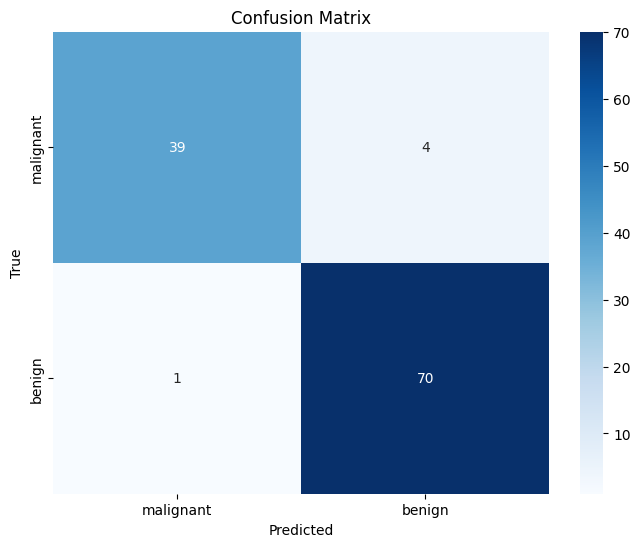

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [4]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=cancer_data.target_names)
print('Classification Report:')
print(class_report)

---

In [32]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Sample data
data = {
    'Age': [25, 45, 35, 50, 23, 34, 40, 31, 28, 38],
    'Salary': [50000, 100000, 75000, 120000, 48000, 62000, 98000, 70000, 52000, 85000],
    'Location': ['Urban', 'Rural', 'Urban', 'Suburban', 'Rural', 'Suburban', 'Urban', 'Urban', 'Rural', 'Suburban'],
    'Purchase': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)
df

,Age,Salary,Location,Purchase
0,25,50000,Urban,Yes
1,45,100000,Rural,No
2,35,75000,Urban,Yes
3,50,120000,Suburban,No
4,23,48000,Rural,Yes
5,34,62000,Suburban,No
6,40,98000,Urban,Yes
7,31,70000,Urban,No
8,28,52000,Rural,Yes
9,38,85000,Suburban,No


In [34]:
# Encode the target variable before defining X and y
label_encoder = LabelEncoder()
df['Purchase'] = label_encoder.fit_transform(df['Purchase'])  # 1 for "Yes", 0 for "No"
df

,Age,Salary,Location,Purchase
0,25,50000,Urban,1
1,45,100000,Rural,0
2,35,75000,Urban,1
3,50,120000,Suburban,0
4,23,48000,Rural,1
5,34,62000,Suburban,0
6,40,98000,Urban,1
7,31,70000,Urban,0
8,28,52000,Rural,1
9,38,85000,Suburban,0


In [35]:
# Convert categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns=['Location'], drop_first=True)
df

,Age,Salary,Purchase,Location_Suburban,Location_Urban
0,25,50000,1,False,True
1,45,100000,0,False,False
2,35,75000,1,False,True
3,50,120000,0,True,False
4,23,48000,1,False,False
5,34,62000,0,True,False
6,40,98000,1,False,True
7,31,70000,0,False,True
8,28,52000,1,False,False
9,38,85000,0,True,False


In [36]:
# Define X and y after preprocessing
X = df.drop('Purchase', axis=1)
y = df['Purchase']

In [37]:
X

,Age,Salary,Location_Suburban,Location_Urban
0,25,50000,False,True
1,45,100000,False,False
2,35,75000,False,True
3,50,120000,True,False
4,23,48000,False,False
5,34,62000,True,False
6,40,98000,False,True
7,31,70000,False,True
8,28,52000,False,False
9,38,85000,True,False


In [38]:
y

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: Purchase, dtype: int32

In [39]:
# Standardize the features (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_scaled

array([[-1.21047158, -1.12449847, -0.65465367,  1.22474487],
       [ 1.23492555,  1.03799859, -0.65465367, -0.81649658],
       [ 0.01222699, -0.04324994, -0.65465367,  1.22474487],
       [ 1.84627483,  1.90299742,  1.52752523, -0.81649658],
       [-1.45501129, -1.21099836, -0.65465367, -0.81649658],
       [-0.11004287, -0.60549918,  1.52752523, -0.81649658],
       [ 0.62357627,  0.95149871, -0.65465367,  1.22474487],
       [-0.47685244, -0.25949965, -0.65465367,  1.22474487],
       [-0.84366201, -1.03799859, -0.65465367, -0.81649658],
       [ 0.37903655,  0.38924947,  1.52752523, -0.81649658]])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [42]:
# Define the logistic regression model
logreg = LogisticRegression(max_iter=10000)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Set up GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [43]:
# Predict on the test set using the best found parameters
y_pred = grid_search.predict(X_test)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



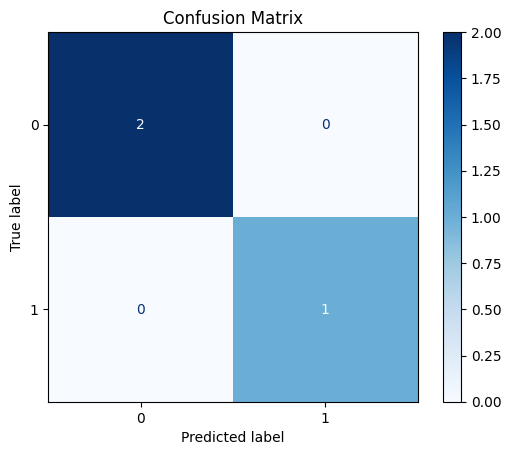

In [44]:
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()